In [2]:
# _*_ coding:utf-8 _*_

import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F



In [3]:
#Data

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [5]:
# model

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension
    def forward(self, x):
            out = self.linear(x)
            return out
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)



In [6]:
# train

num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)
# forward
    out = model(inputs) # 前向传播
    loss = criterion(out, target) # 计算loss
    # backward
    optimizer.zero_grad() # 梯度归零
    loss.backward() # 方向传播
    optimizer.step() # 更新参数
    if (epoch+1) % 20 == 0:
            print('Epoch[{}/{}], loss: {:.6f}'.format(epoch+1,
                                                      num_epochs,
                                                      loss.data[0]))


Epoch[20/1000], loss: 3.400856
Epoch[40/1000], loss: 2.569776
Epoch[60/1000], loss: 1.982295
Epoch[80/1000], loss: 1.566976
Epoch[100/1000], loss: 1.273331
Epoch[120/1000], loss: 1.065681
Epoch[140/1000], loss: 0.918807
Epoch[160/1000], loss: 0.814884
Epoch[180/1000], loss: 0.741318
Epoch[200/1000], loss: 0.689207
Epoch[220/1000], loss: 0.652259
Epoch[240/1000], loss: 0.626027
Epoch[260/1000], loss: 0.607370
Epoch[280/1000], loss: 0.594065
Epoch[300/1000], loss: 0.584544
Epoch[320/1000], loss: 0.577697
Epoch[340/1000], loss: 0.572739
Epoch[360/1000], loss: 0.569118
Epoch[380/1000], loss: 0.566440
Epoch[400/1000], loss: 0.564430
Epoch[420/1000], loss: 0.562892
Epoch[440/1000], loss: 0.561687
Epoch[460/1000], loss: 0.560718
Epoch[480/1000], loss: 0.559917
Epoch[500/1000], loss: 0.559233
Epoch[520/1000], loss: 0.558632
Epoch[540/1000], loss: 0.558091
Epoch[560/1000], loss: 0.557592
Epoch[580/1000], loss: 0.557122


Epoch[600/1000], loss: 0.556674
Epoch[620/1000], loss: 0.556240
Epoch[640/1000], loss: 0.555818
Epoch[660/1000], loss: 0.555403
Epoch[680/1000], loss: 0.554994
Epoch[700/1000], loss: 0.554588
Epoch[720/1000], loss: 0.554186
Epoch[740/1000], loss: 0.553786
Epoch[760/1000], loss: 0.553388
Epoch[780/1000], loss: 0.552991
Epoch[800/1000], loss: 0.552595
Epoch[820/1000], loss: 0.552200
Epoch[840/1000], loss: 0.551806
Epoch[860/1000], loss: 0.551412
Epoch[880/1000], loss: 0.551019
Epoch[900/1000], loss: 0.550626
Epoch[920/1000], loss: 0.550234
Epoch[940/1000], loss: 0.549842
Epoch[960/1000], loss: 0.549451
Epoch[980/1000], loss: 0.549060


Epoch[1000/1000], loss: 0.548670


In [7]:
# validation

model.eval()
predict = model(Variable(x_train))
predict = predict.data.numpy()


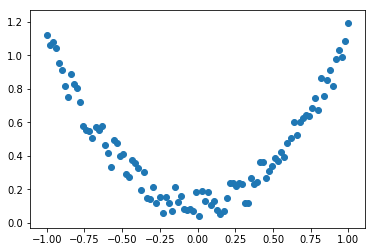

In [30]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable
# 生成数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1)
y = x.pow(2) + 0.2 * torch.rand(x.size())
# 变为Variable
x, y = Variable(x), Variable(y)
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [31]:
# 定义pytorch网络
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
            super(Net, self).__init__()
            self.hidden = torch.nn.Linear(n_features, n_hidden)
            self.predict = torch.nn.Linear(n_hidden, n_output)
    def forward(self, x):
            x = F.relu(self.hidden(x))
            y = self.predict(x)
            return y


In [32]:
net = Net(1, 10, 1)
print(net)

In [33]:
# 选择优化方法
optimizer = torch.optim.SGD(net.parameters(), lr = 0.5)
# 选择损失函数
loss_func = torch.nn.MSELoss()
plt.ion()
plt.show()

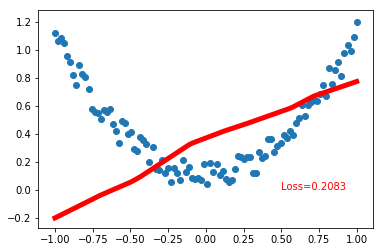

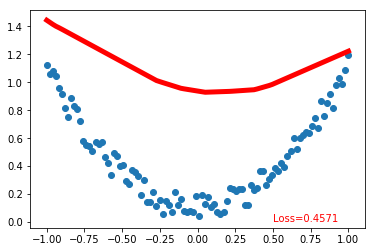

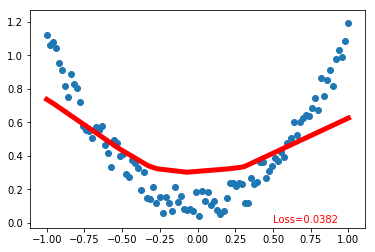

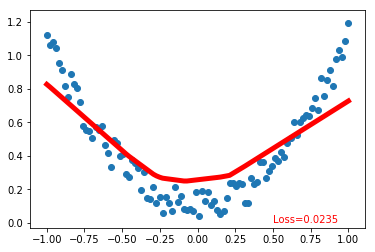

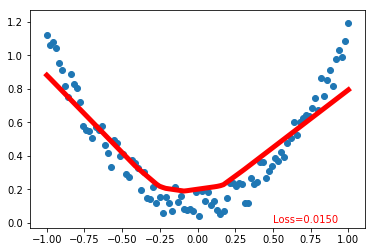

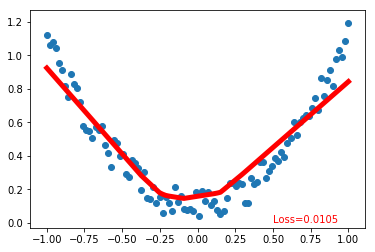

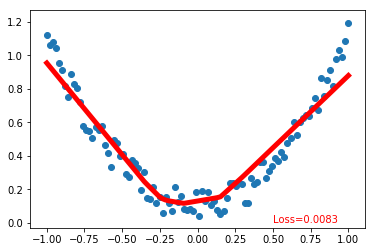

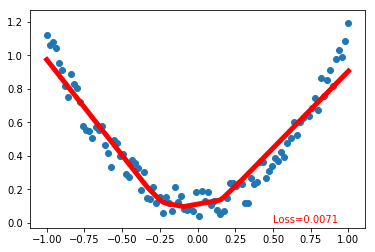

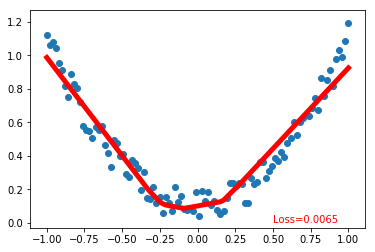

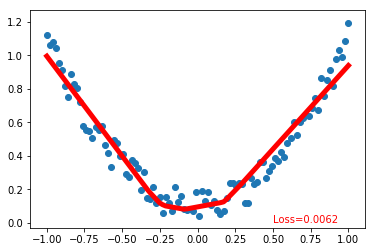

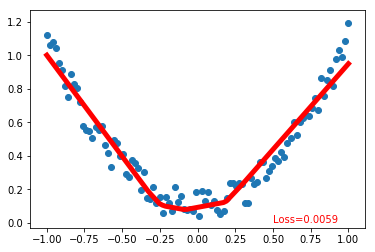

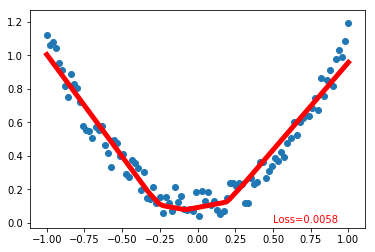

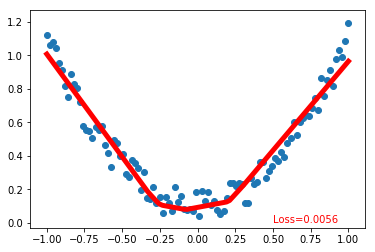

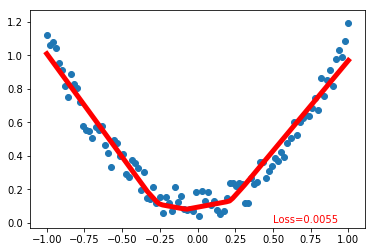

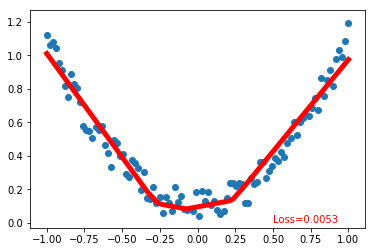

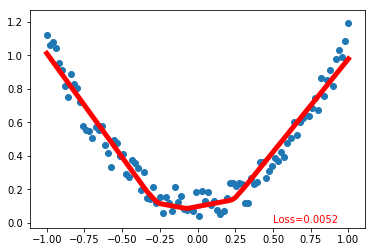

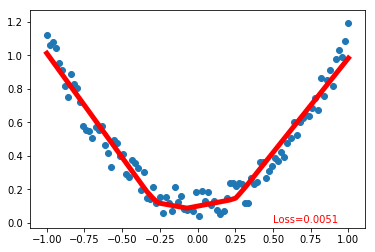

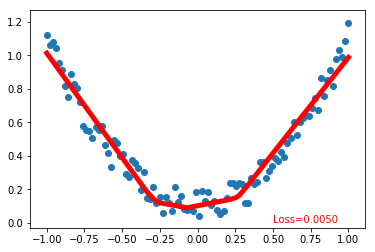

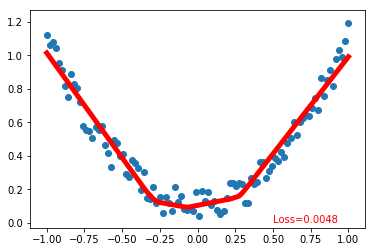

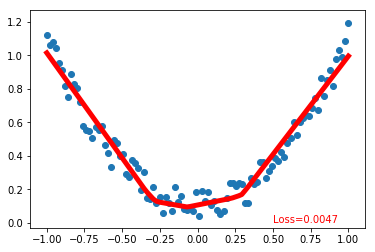

In [34]:
# 训练
for i in range(100):
    # 对x进行预测
    prediction = net(x)
    # 计算损失
    loss = loss_func(prediction, y)
    # 每次迭代清空上一次的梯度
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 更新梯度
    optimizer.step()
    if i % 5 == 0:
            plt.cla()
            plt.scatter(x.data.numpy(), y.data.numpy())
            plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw = 5)
            plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 10, 'color':  'red'})
            plt.pause(0.1)
plt.ioff()
plt.show()


In [19]:
# unsqueeze用法, 一维变二维
x = torch.Tensor([1, 2, 3, 4])
print (x) 
print (torch.unsqueeze(x, 0))
print (torch.unsqueeze(x, 1))



 1
 2
 3
 4
[torch.FloatTensor of size 4]


 1  2  3  4
[torch.FloatTensor of size 1x4]


 1
 2
 3
 4
[torch.FloatTensor of size 4x1]



In [20]:
# rand用法, rand返回的是[0,1)之间的均匀分布
print (torch.rand(4))
print (torch.rand(2, 3))



 0.1490
 0.5074
 0.0751
 0.5217
[torch.FloatTensor of size 4]


 0.0955  0.9472  0.2146
 0.3179  0.7252  0.5914
[torch.FloatTensor of size 2x3]



Epoch [5/60], Loss: 4.7234
Epoch [10/60], Loss: 2.0147
Epoch [15/60], Loss: 0.9173
Epoch [20/60], Loss: 0.4728
Epoch [25/60], Loss: 0.2927
Epoch [30/60], Loss: 0.2197
Epoch [35/60], Loss: 0.1902
Epoch [40/60], Loss: 0.1782
Epoch [45/60], Loss: 0.1733
Epoch [50/60], Loss: 0.1714
Epoch [55/60], Loss: 0.1706
Epoch [60/60], Loss: 0.1702


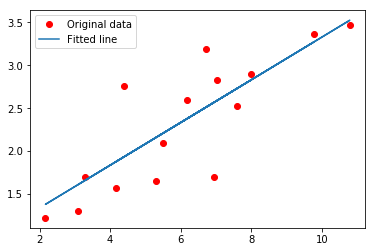

In [35]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable


# Hyper Parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy Dataset 
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the Model 
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' 
               %(epoch+1, num_epochs, loss.data[0]))
        
# Plot the graph
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the Model
torch.save(model.state_dict(), 'model.pkl')

In [ ]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable


#========================== Table of Contents ==========================#
# 1. Basic autograd example 1               (Line 21 to 36)
# 2. Basic autograd example 2               (Line 39 to 77)
# 3. Loading data from numpy                (Line 80 to 83)
# 4. Implementing the input pipline         (Line 86 to 113)
# 5. Input pipline for custom dataset       (Line 116 to 138)
# 6. Using pretrained model                 (Line 141 to 155)
# 7. Save and load model                    (Line 158 to 165) 


#======================= Basic autograd example 1 =======================#
# Create tensors.
x = Variable(torch.Tensor([1]), requires_grad=True)
w = Variable(torch.Tensor([2]), requires_grad=True)
b = Variable(torch.Tensor([3]), requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 


#======================== Basic autograd example 2 =======================#
# Create tensors.
x = Variable(torch.randn(5, 3))
y = Variable(torch.randn(5, 2))

# Build a linear layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build Loss and Optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward propagation.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.data[0])

# Backpropagation.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step Optimization (gradient descent).
optimizer.step()

# You can also do optimization at the low level as shown below.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after optimization.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.data[0])


#======================== Loading data from numpy ========================#
a = np.array([[1,2], [3,4]])
b = torch.from_numpy(a)      # convert numpy array to torch tensor
c = b.numpy()                # convert torch tensor to numpy array


#===================== Implementing the input pipline =====================#
# Download and construct dataset.
train_dataset = dsets.CIFAR10(root='../data/',
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

# Select one data pair (read data from disk).
image, label = train_dataset[0]
print (image.size())
print (label)

# Data Loader (this provides queue and thread in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100, 
                                           shuffle=True,
                                           num_workers=2)

# When iteration starts, queue and thread start to load dataset from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of data loader is as below.
for images, labels in train_loader:
    # Your training code will be written here
    pass


#===================== Input pipline for custom dataset =====================#
# You should build custom dataset as below.
class CustomDataset(data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file path or list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# Then, you can just use prebuilt torch's data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=100, 
                                           shuffle=True,
                                           num_workers=2)


#========================== Using pretrained model ==========================#
# Download and load pretrained resnet.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only top layer of the model.
for param in resnet.parameters():
    param.requires_grad = False
    
# Replace top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is for example.

# For test.
images = Variable(torch.randn(10, 3, 256, 256))
outputs = resnet(images)
print (outputs.size())   # (10, 100)


#============================ Save and load the model ============================#
# Save and load the entire model.
torch.save(resnet, 'model.pkl')
model = torch.load('model.pkl')

# Save and load only the model parameters(recommended).
torch.save(resnet.state_dict(), 'params.pkl')
resnet.load_state_dict(torch.load('params.pkl'))

Variable containing:
 2
[torch.FloatTensor of size 1]

Variable containing:
 1
[torch.FloatTensor of size 1]

Variable containing:
 1
[torch.FloatTensor of size 1]

w:  Parameter containing:
-0.2993 -0.0453 -0.3183
 0.0083  0.5408 -0.5661
[torch.FloatTensor of size 2x3]

b:  Parameter containing:
-0.0133
-0.3817
[torch.FloatTensor of size 2]

loss:  0.8798510432243347
dL/dw:  Variable containing:
 0.0486 -0.1082 -0.1073
-0.3078 -0.3130 -0.9026
[torch.FloatTensor of size 2x3]

dL/db:  Variable containing:
 0.0924
-0.1411
[torch.FloatTensor of size 2]

loss after 1 step optimization:  0.869294285774231
